# Importing Libraries and reading the data

In [553]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [554]:
#setting display option
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [555]:
# Read user engagement file
user_eng = pd.read_csv('takehome_user_engagement.csv')
user_eng.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [556]:
# Trying to read the users file, but getting encoding error. File not UTF-8 encoded.
# Find out the encoding for the file
with open("takehome_users.csv") as f:
    print(f.encoding)

cp1252


In [558]:
# Read the user file by specifying the encoding.
users = pd.read_csv("takehome_users.csv", sep=',', encoding='cp1252')
users.head(5)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [559]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [560]:
user_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [561]:
user_eng.head(5)

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


# Data Cleaning - user_eng data

In [562]:

user_eng['time_stamp'] = pd.to_datetime(user_eng['time_stamp']).dt.date

In [563]:
user_eng['time_stamp']


0         2014-04-22
1         2013-11-15
2         2013-11-29
3         2013-12-09
4         2013-12-25
             ...    
207912    2013-09-06
207913    2013-01-15
207914    2014-04-27
207915    2012-06-02
207916    2014-01-26
Name: time_stamp, Length: 207917, dtype: object

In [564]:
user_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [565]:
#Sorting values by user_id and then time_stamp

user_eng = user_eng.sort_values(['user_id', 'time_stamp'])

In [566]:
user_eng.head(5)

,time_stamp,user_id,visited
0,2014-04-22,1,1
1,2013-11-15,2,1
2,2013-11-29,2,1
3,2013-12-09,2,1
4,2013-12-25,2,1


In [567]:
#checking for duplicates

Duplicates = user_eng.duplicated().sum()
Duplicates

0

# Finding the adopted users

In [568]:
# Checking unique user_ids

user_eng['user_id'].unique()

array([    1,     2,     3, ..., 11998, 11999, 12000], dtype=int64)

In [569]:
# Finding the Adopted Users

adopt = []

for i in range(1,12001):

    user = user_eng[user_eng['user_id'] == i].reset_index(drop=True)

    tot_trans = user['time_stamp'].count()
    
    if tot_trans < 3:
        continue

    for j in range(1,tot_trans-1):
        diff = (user.loc[j+1, 'time_stamp']) - (user.loc[j-1, 'time_stamp'])
        if diff.days < 7 and tot_trans > 3:
            if i in adopt:
                continue
            else:
                adopt.append(i)
                #print(i, (user.loc[j-1, 'time_stamp']), (user.loc[j, 'time_stamp']), (user.loc[j+1, 'time_stamp']))
               
len(adopt)


1594

In [570]:
adopt[1:15]

[10, 20, 33, 42, 43, 50, 53, 63, 69, 74, 80, 81, 82, 87]

In [571]:
# creating an adopted_user column and initializing it with 0
users['adopted_user'] = 0
users.head(3)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0


In [572]:
#users['adopted_user'] = users['adopted_user'].apply(lambda x : 1 if x in adopt else 0)
#users.head(20)

In [573]:
# assigning 1 for adopted users
for i in adopt:
    users.loc[i-1, 'adopted_user'] = 1 

In [574]:
users.head(3)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0


# adding time_since_creation column

In [575]:
#users['creation_time'].info()

users['creation_time'] = pd.to_datetime(users['creation_time']).dt.date

users['time_since_creation'] = users['creation_time'].max() - users['creation_time']

In [576]:
users.sort_values(by='creation_time', ascending=False).head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,time_since_creation
5332,5333,2014-05-30,Cox Eve,EveCox@jourrapide.com,ORG_INVITE,1.401590e+09,0,0,126,5480.0,0,0 days
5583,5584,2014-05-30,Moore Sam,SamMoore@gustr.com,GUEST_INVITE,1.401572e+09,0,0,86,8152.0,0,0 days
7418,7419,2014-05-30,Beazley Jasper,JasperBeazley@gmail.com,GUEST_INVITE,NaN,0,0,97,10649.0,0,0 days
11394,11395,2014-05-30,Iversen Clara,ClaraGIversen@jourrapide.com,PERSONAL_PROJECTS,NaN,0,0,3,NaN,0,0 days
5633,5634,2014-05-30,Thomas Rose,RoseMThomas@jourrapide.com,ORG_INVITE,1.401629e+09,0,0,183,9744.0,0,0 days


In [577]:
users

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,time_since_creation
0,1,2014-04-22,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0,38 days
1,2,2013-11-15,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1,196 days
2,3,2013-03-19,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0,437 days
3,4,2013-05-21,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0,374 days
4,5,2013-01-17,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0,498 days
...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,0,266 days
11996,11997,2013-01-10,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN,0,505 days
11997,11998,2014-04-27,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,0,33 days
11998,11999,2012-05-31,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN,0,729 days


# User Engagement by date

In [578]:
#user_eng = user_eng.reset_index(drop=True)
user_eng_by_date = user_eng.groupby('time_stamp')['visited'].count()
user_eng_by_date = pd.DataFrame(user_eng_by_date)
user_eng_by_date

,visited
time_stamp,
2012-05-31,4
2012-06-01,6
2012-06-02,9
2012-06-03,11
2012-06-04,11
...,...
2014-06-01,450
2014-06-02,404
2014-06-03,398


Text(0, 0.5, 'number of visits')

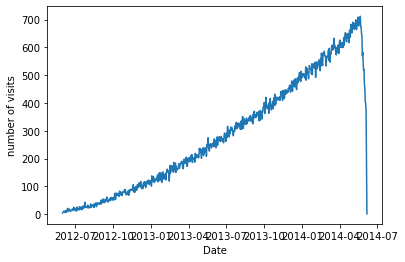

In [579]:
fig, ax = plt.subplots()
ax.plot(user_eng_by_date.index, user_eng_by_date['visited'])
ax.set_xlabel('Date')
ax.set_ylabel('number of visits')



# user_engagement has been increasing steadly from 2012 to 2014.

# Correlations

In [580]:
users[['opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id', 'adopted_user']].corr()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
opted_in_to_mailing_list,1.000000,0.483529,0.003432,0.004699,0.008680
enabled_for_marketing_drip,0.483529,1.000000,0.009275,0.003687,0.004797
org_id,0.003432,0.009275,1.000000,-0.057780,0.064594
invited_by_user_id,0.004699,0.003687,-0.057780,1.000000,0.001353
adopted_user,0.008680,0.004797,0.064594,0.001353,1.000000


In [581]:
# enabled_for_marketing_drip and opted_in_to_mailing_list seem to be most correlated than other variables.
# the org_id column seem to have a little better correlation with adopted_user column. But it is unclear if 
   # the org_id column has any meaning. May be smaller org_id number means organizations that have long time relationships
    # with the company?? May be recently joined organizations typically start with smaller number of users 
    # and grow their users gradually.
    # 0 seems to be the most frequently appearing org_id. That may represent the missing values, but I am not sure.

### org_id and adopted_user

In [582]:
orgs = users['org_id'].value_counts(sort=True, ascending=False)
orgs = list(orgs[orgs>100].index)
orgs

power_orgs = users[['org_id', 'adopted_user']]
power_orgs = power_orgs[power_orgs['org_id'].isin(orgs)]
#power_users.sort_values(by='invited_by_user_id', ascending=True)
power_orgs['adopted_user'].value_counts(normalize=True)

0    0.922032
1    0.077968
Name: adopted_user, dtype: float64

In [583]:
users['adopted_user'].value_counts(normalize=True)

0    0.867167
1    0.132833
Name: adopted_user, dtype: float64

(array([3628., 1581., 1234., 1003.,  933.,  838.,  772.,  710.,  681.,
         620.]),
 array([  0. ,  41.6,  83.2, 124.8, 166.4, 208. , 249.6, 291.2, 332.8,
        374.4, 416. ]),
 <BarContainer object of 10 artists>)

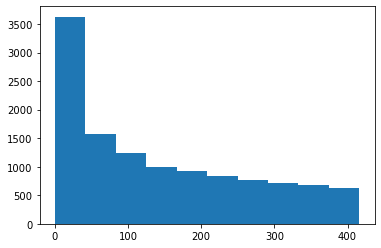

In [584]:
plt.hist(users['org_id'])

In [585]:
# As org_id increases, the number of users that came through them decreases.
# However, the organizations that have more than 100 users seem to have less percentage of their users (7%)
# adopted than the general population (13%).

# Handling Missing Values

In [586]:
# Handling missing values

Missing = users.isnull().sum().transpose()
Missing


object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
adopted_user                     0
time_since_creation              0
dtype: int64

In [587]:
import math
users['invited'] = users['invited_by_user_id'].apply(lambda x: 0 if math.isnan(x) else 1)

In [588]:
users.head(3)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,time_since_creation,invited
0,1,2014-04-22,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0,38 days,1
1,2,2013-11-15,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1,196 days,1
2,3,2013-03-19,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0,437 days,1


# invited_by_user_id and adopted_user

(array([560., 698., 646., 695., 628., 637., 723., 652., 604., 574.]),
 array([3.00000e+00, 1.20260e+03, 2.40220e+03, 3.60180e+03, 4.80140e+03,
        6.00100e+03, 7.20060e+03, 8.40020e+03, 9.59980e+03, 1.07994e+04,
        1.19990e+04]),
 <BarContainer object of 10 artists>)

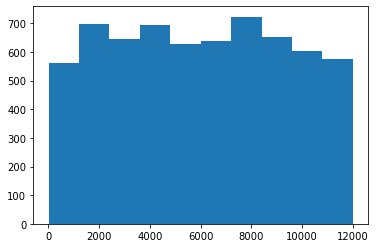

In [589]:
plt.hist(users['invited_by_user_id'])

In [590]:
pd.set_option('display.max_rows', 500)
inviter = users['invited_by_user_id'].value_counts(sort=True)
inviter = list(inviter[inviter>10].index)


In [591]:
inviter

[10741.0, 2527.0, 1525.0, 11770.0, 2308.0]

In [592]:
power_users = users[['invited_by_user_id', 'adopted_user']]
power_users = power_users[power_users['invited_by_user_id'].isin(inviter)]
#power_users.sort_values(by='invited_by_user_id', ascending=True)
power_users['adopted_user'].value_counts(normalize=True)

0    0.913793
1    0.086207
Name: adopted_user, dtype: float64

In [593]:
users['adopted_user'].value_counts(normalize=True)

0    0.867167
1    0.132833
Name: adopted_user, dtype: float64

In [594]:
# I ananlysed the invited_by_user_id and adopted_user columns to see if they have any relations. I selected the inviters
# who have invited more than 10 users and calculated the percentage of the users they invited who became adopted_users. 
# Their adoption rate was 8% as compared to the 13% adoption rate of all users. Inviting more users didn't seem 
# to translate to higher adoption rate.



# Creation time_since_creation column

In [595]:
users['time_since_creation'] = users['time_since_creation'].dt.days

In [596]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,time_since_creation,invited
0,1,2014-04-22,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0,38,1
1,2,2013-11-15,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1,196,1
2,3,2013-03-19,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0,437,1
3,4,2013-05-21,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0,374,1
4,5,2013-01-17,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0,498,1


In [597]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

to_standardize = users['time_since_creation']
to_standardize = pd.DataFrame(to_standardize)
to_standardize
scaler.fit(to_standardize)
time_since_creation_s = scaler.transform(to_standardize)
time_since_creation_s = pd.DataFrame(time_since_creation_s, columns=['time_since_creation_s'])
time_since_creation_s

users = users.join(time_since_creation_s)
users.head(3)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,time_since_creation,invited,time_since_creation_s
0,1,2014-04-22,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0,38,1,-1.292250
1,2,2013-11-15,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1,196,1,-0.562904
2,3,2013-03-19,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0,437,1,0.549580


In [598]:
users = users.drop('time_since_creation', axis=1)

# Preparing the data for modeling

In [599]:
df = users.drop(['name', 'email','last_session_creation_time', 'creation_time'], axis=1)

In [600]:
df.isna().sum()

object_id                        0
creation_source                  0
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
adopted_user                     0
invited                          0
time_since_creation_s            0
dtype: int64

### org_id
org id seems to have to be a categorical column. However, because of the trend I saw in the data, 
for now, I will keep it as integer and use it in the modeling.


org_id is categorical column. But it has too many rows to perform one_hot_encoding on.
Therefore, I am taking the org_id's that occur more than 150 times and put the rest in the 'other' category.

pd.set_option('display.max_rows', 500)
df['org_id'].value_counts(sort=True)


In [601]:
df['invited_by_user_id'] = df['invited_by_user_id'].apply(lambda x: 0 if math.isnan(x) else x)
df['invited_by_user_id'].astype(int)
df.sample(5)

,object_id,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,invited,time_since_creation_s
849,850,SIGNUP_GOOGLE_AUTH,0,0,14,0.0,0,0,1.694376
9333,9334,SIGNUP_GOOGLE_AUTH,0,0,354,0.0,0,0,-1.190695
11837,11838,PERSONAL_PROJECTS,1,1,29,0.0,0,0,0.378784
10386,10387,PERSONAL_PROJECTS,0,0,165,0.0,0,0,-0.549055
10091,10092,SIGNUP_GOOGLE_AUTH,0,0,54,0.0,0,0,-1.356875


In [602]:
# Correlation with the id columns
df[['object_id', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id', 'adopted_user', 'invited', 'time_since_creation_s']].corr()

,object_id,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,invited,time_since_creation_s
object_id,1.000000,-0.032370,-0.022040,0.004110,0.001657,0.006213,-0.009149,-0.011005
opted_in_to_mailing_list,-0.032370,1.000000,0.483529,0.003432,0.007536,0.008680,0.006934,0.007304
enabled_for_marketing_drip,-0.022040,0.483529,1.000000,0.009275,0.003431,0.004797,0.002216,-0.005142
org_id,0.004110,0.003432,0.009275,1.000000,-0.040868,0.064594,-0.018442,-0.004739
invited_by_user_id,0.001657,0.007536,0.003431,-0.040868,1.000000,0.022452,0.768770,-0.011976
adopted_user,0.006213,0.008680,0.004797,0.064594,0.022452,1.000000,0.028358,0.089379
invited,-0.009149,0.006934,0.002216,-0.018442,0.768770,0.028358,1.000000,-0.005307
time_since_creation_s,-0.011005,0.007304,-0.005142,-0.004739,-0.011976,0.089379,-0.005307,1.000000


In [603]:
# Correlation without the id columns
# Correlation with the id columns
df[['opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'adopted_user', 'invited', 'time_since_creation_s']].corr()

,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted_user,invited,time_since_creation_s
opted_in_to_mailing_list,1.000000,0.483529,0.008680,0.006934,0.007304
enabled_for_marketing_drip,0.483529,1.000000,0.004797,0.002216,-0.005142
adopted_user,0.008680,0.004797,1.000000,0.028358,0.089379
invited,0.006934,0.002216,0.028358,1.000000,-0.005307
time_since_creation_s,0.007304,-0.005142,0.089379,-0.005307,1.000000


In [604]:
# It appears time_since_creation_s has the most correlation (positive correlation) with adopted user column 
# followed by the invited variable.

# one-hot-encoding the creation source column

In [605]:
df = pd.get_dummies(df, prefix=['source_'], columns=['creation_source'])

In [606]:
df.head(3)

,object_id,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,invited,time_since_creation_s,source__GUEST_INVITE,source__ORG_INVITE,source__PERSONAL_PROJECTS,source__SIGNUP,source__SIGNUP_GOOGLE_AUTH
0,1,1,0,11,10803.0,0,1,-1.292250,1,0,0,0,0
1,2,0,0,1,316.0,1,1,-0.562904,0,1,0,0,0
2,3,0,0,94,1525.0,0,1,0.549580,0,1,0,0,0


In [607]:
#df['org_id'] = df['org_id'].apply(lambda x: 'other' if x<150 else x)
      
#users['invited'] = users['invited_by_user_id'].apply(lambda x: 0 if math.isnan(x) else 1)

# Feature importance without the id columns

In [608]:
df1 = df.drop(['object_id', 'org_id', 'invited_by_user_id'], axis=1)

In [609]:
y = df1['adopted_user']
X = df1.drop(columns='adopted_user', axis=1)

In [610]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [611]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(9600, 9) (9600,) (2400, 9) (2400,)


In [612]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

importance = rf.feature_importances_

In [613]:
#X.columns
columns = X.columns
columns = pd.DataFrame(columns)
importance = pd.DataFrame(importance)
importance['columns'] = columns


In [614]:
importance.columns = ['imp', 'cols']
importance = importance.sort_values(by='imp', ascending=False)
importance = importance.reset_index(drop=True)
importance

,imp,cols
0,0.968460,time_since_creation_s
1,0.008089,opted_in_to_mailing_list
2,0.007059,source__PERSONAL_PROJECTS
3,0.006873,enabled_for_marketing_drip
4,0.002646,source__GUEST_INVITE
5,0.002155,source__SIGNUP_GOOGLE_AUTH
6,0.001789,source__ORG_INVITE
7,0.001486,source__SIGNUP
8,0.001444,invited


In [615]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
y_pred_probs = rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_probs)
print('ROC/AUC Score:', roc_auc_score(y_test, y_pred_probs))


ROC/AUC Score: 0.5661952294298152


In [616]:
# It appears the creation_source column, especially, the sources personal_projects and guest_invite are important variables
# for users being an adopted user. opted_in_to_mailing_list is the next important variable.

# Feature importance with the id columns

##### standardizing object_id, org_id and invited_by_user_id columns

In [617]:
# I am not sure if user_id and org_id have any significance. 
# I will run a model with and without them and compare the difference. 

In [618]:
df.columns

Index(['object_id', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip',
       'org_id', 'invited_by_user_id', 'adopted_user', 'invited',
       'time_since_creation_s', 'source__GUEST_INVITE', 'source__ORG_INVITE',
       'source__PERSONAL_PROJECTS', 'source__SIGNUP',
       'source__SIGNUP_GOOGLE_AUTH'],
      dtype='object')

In [619]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

cols_to_standardize = ['object_id', 'org_id', 'invited_by_user_id']
scaler.fit(df[cols_to_standardize])
standardized_cols = scaler.transform(df[cols_to_standardize])
standardized_cols

array([[-1.73190648, -1.05508217,  1.96809807],
       [-1.7316178 , -1.13569382, -0.74251498],
       [-1.73132913, -0.38600551, -0.43002035],
       ...,
       [ 1.73132913, -0.47467832,  1.26272351],
       [ 1.7316178 , -1.095388  , -0.82419265],
       [ 1.73190648, -1.14375498, -0.82419265]])

In [620]:
standardized_cols = pd.DataFrame(standardized_cols, columns=['user_id_s', 'org_id_s', 'invited_by_user_id_s'])
standardized_cols
df2 = df.join(standardized_cols)
df2.head(3)

,object_id,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,invited,time_since_creation_s,source__GUEST_INVITE,source__ORG_INVITE,source__PERSONAL_PROJECTS,source__SIGNUP,source__SIGNUP_GOOGLE_AUTH,user_id_s,org_id_s,invited_by_user_id_s
0,1,1,0,11,10803.0,0,1,-1.292250,1,0,0,0,0,-1.731906,-1.055082,1.968098
1,2,0,0,1,316.0,1,1,-0.562904,0,1,0,0,0,-1.731618,-1.135694,-0.742515
2,3,0,0,94,1525.0,0,1,0.549580,0,1,0,0,0,-1.731329,-0.386006,-0.430020


In [621]:
df2 = df2.drop(columns = ['object_id', 'org_id', 'invited_by_user_id'], axis=1)

In [622]:
df2.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted_user,invited,time_since_creation_s,source__GUEST_INVITE,source__ORG_INVITE,source__PERSONAL_PROJECTS,source__SIGNUP,source__SIGNUP_GOOGLE_AUTH,user_id_s,org_id_s,invited_by_user_id_s
0,1,0,0,1,-1.292250,1,0,0,0,0,-1.731906,-1.055082,1.968098
1,0,0,1,1,-0.562904,0,1,0,0,0,-1.731618,-1.135694,-0.742515
2,0,0,0,1,0.549580,0,1,0,0,0,-1.731329,-0.386006,-0.430020
3,0,0,0,1,0.258765,1,0,0,0,0,-1.731040,-1.135694,0.507205
4,0,0,0,1,0.831163,1,0,0,0,0,-1.730752,0.412050,0.530209


In [623]:
df2.corr()

,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted_user,invited,time_since_creation_s,source__GUEST_INVITE,source__ORG_INVITE,source__PERSONAL_PROJECTS,source__SIGNUP,source__SIGNUP_GOOGLE_AUTH,user_id_s,org_id_s,invited_by_user_id_s
opted_in_to_mailing_list,1.000000,0.483529,0.008680,0.006934,0.007304,0.000667,0.006694,-0.007432,0.002181,-0.004555,-0.032370,0.003432,0.007536
enabled_for_marketing_drip,0.483529,1.000000,0.004797,0.002216,-0.005142,-0.002438,0.004270,-0.007518,0.004528,0.000127,-0.022040,0.009275,0.003431
adopted_user,0.008680,0.004797,1.000000,0.028358,0.089379,0.045148,-0.006710,-0.075715,0.010220,0.033831,0.006213,0.064594,0.022452
invited,0.006934,0.002216,0.028358,1.000000,-0.005307,0.437386,0.691238,-0.495336,-0.491916,-0.387255,-0.009149,-0.018442,0.768770
time_since_creation_s,0.007304,-0.005142,0.089379,-0.005307,1.000000,0.012021,-0.015193,0.026567,-0.015802,-0.004628,-0.011005,-0.004739,-0.011976
source__GUEST_INVITE,0.000667,-0.002438,0.045148,0.437386,0.012021,1.000000,-0.347502,-0.216653,-0.215157,-0.169380,-0.006909,-0.002045,0.330140
source__ORG_INVITE,0.006694,0.004270,-0.006710,0.691238,-0.015193,-0.347502,1.000000,-0.342395,-0.340031,-0.267686,-0.003988,-0.017586,0.536313
source__PERSONAL_PROJECTS,-0.007432,-0.007518,-0.075715,-0.495336,0.026567,-0.216653,-0.342395,1.000000,-0.211995,-0.166891,-0.003357,0.008974,-0.380800
source__SIGNUP,0.002181,0.004528,0.010220,-0.491916,-0.015802,-0.215157,-0.340031,-0.211995,1.000000,-0.165739,0.002692,0.016140,-0.378170
source__SIGNUP_GOOGLE_AUTH,-0.004555,0.000127,0.033831,-0.387255,-0.004628,-0.169380,-0.267686,-0.166891,-0.165739,1.000000,0.015089,-0.001052,-0.297710


# Modeling

In [624]:
y2 = df2['adopted_user']
X2 = df2.drop(columns='adopted_user', axis=1)

In [625]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [626]:
print(X2_train.shape, y2_train.shape, X2_test.shape, y2_test.shape)

(9600, 12) (9600,) (2400, 12) (2400,)


In [627]:
from sklearn.ensemble import RandomForestClassifier
rf2 = RandomForestClassifier(n_estimators=100)
rf2.fit(X2_train, y2_train)
y2_pred = rf2.predict(X2_test)

importance2 = rf2.feature_importances_

In [628]:
#X.columns
columns2 = X2.columns
columns2 = pd.DataFrame(columns2)
importance2 = pd.DataFrame(importance2)
importance2['columns'] = columns2


In [629]:
importance2.columns = ['imp', 'cols']
importance2 = importance2.sort_values(by='imp', ascending=False)


In [630]:
importance2.reset_index(drop=True)

,imp,cols
0,0.283190,time_since_creation_s
1,0.278987,user_id_s
2,0.252664,org_id_s
3,0.136995,invited_by_user_id_s
4,0.014998,opted_in_to_mailing_list
5,0.011819,enabled_for_marketing_drip
6,0.005319,source__PERSONAL_PROJECTS
7,0.003668,source__GUEST_INVITE
8,0.003543,source__SIGNUP_GOOGLE_AUTH
9,0.003509,source__SIGNUP


In [631]:
# The 3 id columns, user_id, org_id and invited_by_user_id came out to be the 3 most important features.

In [632]:
#from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
y2_pred_probs = rf2.predict_proba(X2_test)[:,1]
fpr_rf2, tpr_rf2, thresholds_rf = roc_curve(y2_test, y2_pred_probs)
print('ROC/AUC Score:', roc_auc_score(y2_test, y2_pred_probs))


ROC/AUC Score: 0.60840529032565


In [ ]:
invited by user id field - 
nan - 0 - fillna
invited by a unser that is not adopted - 1
invited by an adopted user - 2

one hot encoding - creation source

creation time - any time related change?

seems important - opted_in_to_mailing_list, enabled_for_marketing_drip

